### sklearn - Classification (분류)

In [1]:
import warnings # 불필요한 경고 출력 방지
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import collections

### sklearn - iris 데이터셋 로드

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

### 'DESCR' - 데이터셋의 정보를 보여줌
#### data - feautre data
#### feature_names - feature data의 컬럼 이름
#### target - label data(수치형)
#### target_names - label의 이름(문자형)

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
target = iris['target']
target[-5:] # 셔플이 안되어있음

array([2, 2, 2, 2, 2])

In [8]:
print("데이터셋 내용: ", iris['target'])

데이터셋 내용:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
print('target 정보: ', collections.Counter(iris['target']))

target 정보:  Counter({0: 50, 1: 50, 2: 50})


In [10]:
target_names = iris['target_names']
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터 프레임 만들기

In [11]:
# 현재 'data'가 2차원이다. 이를 데이터 프레임으로 바꿔줘야한다.
df_iris = pd.DataFrame(data, columns = feature_names) #.dataFrame(인자1, 컬럼설정)

In [12]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df_iris['target'] = target

In [14]:
df_iris['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [15]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 시각화 해보기

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

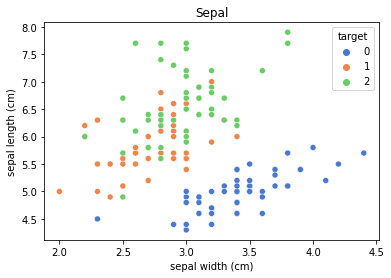

In [17]:
# .scatterplot(x축이름, y축이름, 데이터=값)
# hue = 점들 컬러링 및 범주 타이틀 설정
# palette = 색상 커스터마이징 
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Sepal')
plt.show()

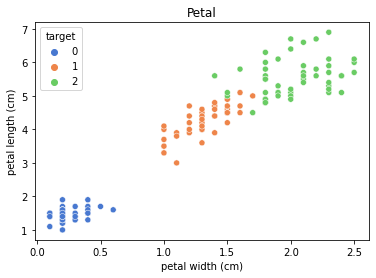

In [18]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()

### 3D 그래프로 그리기

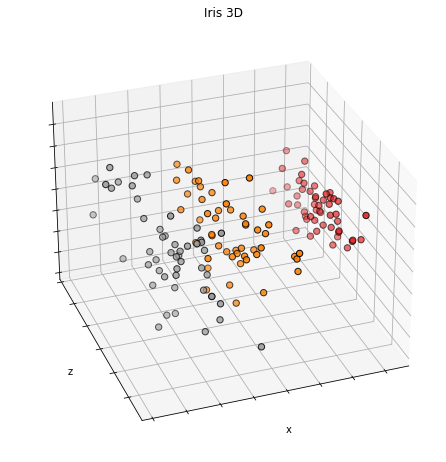

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

#그래프 크기
fig = plt.figure(figsize=(8, 6)) #.figure(figsize=(너비,높이,인치))

# 3차원 변수화
ax = Axes3D(fig, elev=-150, azim=110)

# PCA = 차원변환시 사용하는 함수,
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))


# ax.scatter(1,2,3 차원에 대한 값, 스타일링)
# c = 마커색상
# cmap = 컬러맵에서 색상을 뽑아옴
# s = 마커크기
# edgecolor = 마커 테두리선 색상
ax.scatter(X_reduced[:,0], X_reduced[:,1],X_reduced[:,2],c=df_iris['target'],
          cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title('Iris 3D')
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_ylabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

### 데이터셋 분류

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#순서 중요 x-x, y-y, train_test_split(학습값, 예측값)
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1), df_iris['target'])
# 'target'컬럼은 예측값이기 때문에 feature(학습값)에 반영이 되면 절대 안된다

In [22]:
# len(x_train)

In [23]:
# len(x_valid)

In [24]:
# y_train

In [25]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [26]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

<AxesSubplot:xlabel='target', ylabel='count'>

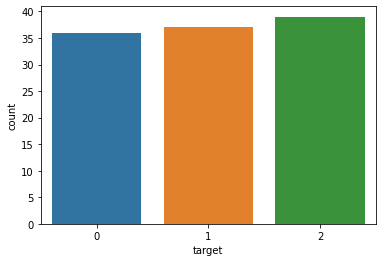

In [27]:
sns.countplot(y_train)

In [28]:
# stratify='' - 데이터 세트 클래스 비율을 유지 한다(즉 훈련용이든 테스트 용이든 고르기 0,1,2 클래스를 다 가지도록 하는것, 쏠림방지)
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1), df_iris['target'],
                                                     stratify=df_iris['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

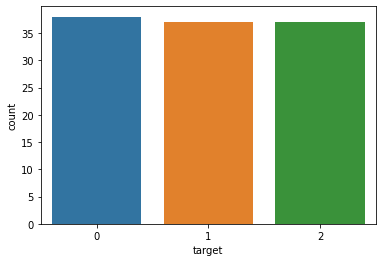

In [29]:
sns.countplot(y_train)

In [30]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [31]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

### 로지스틱 회귀 알고리즘

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
# step 1 - 모델 선언 * 너무나도 중요함
lr = LogisticRegression()

In [34]:
# step 2 - 데이터 준비
# stratify='' - 데이터 세트 클래스 비율을 유지 한다(즉 훈련용이든 테스트 용이든 고르기 0,1,2 클래스를 다 가지도록 하는것, 쏠림방지)
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',1), df_iris['target'],
                                                     stratify=df_iris['target'])

In [35]:
df_iris.loc[45]

sepal length (cm)    4.8
sepal width (cm)     3.0
petal length (cm)    1.4
petal width (cm)     0.3
target               0.0
Name: 45, dtype: float64

In [36]:
x_valid

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
89,5.5,2.5,4.0,1.3
74,6.4,2.9,4.3,1.3
7,5.0,3.4,1.5,0.2
42,4.4,3.2,1.3,0.2
49,5.0,3.3,1.4,0.2
104,6.5,3.0,5.8,2.2
0,5.1,3.5,1.4,0.2
73,6.1,2.8,4.7,1.2
102,7.1,3.0,5.9,2.1
27,5.2,3.5,1.5,0.2


In [37]:
x_train[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
34,4.9,3.1,1.5,0.2
37,4.9,3.6,1.4,0.1
83,6.0,2.7,5.1,1.6
21,5.1,3.7,1.5,0.4
18,5.7,3.8,1.7,0.3


In [38]:
y_train[:5]

34    0
37    0
83    1
21    0
18    0
Name: target, dtype: int32

In [39]:
# step 3 - 모델 학습
lr.fit(x_train, y_train)

LogisticRegression()

In [40]:
# step 4 - 예측
prediction = lr.predict(x_valid)

In [41]:
x_valid

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
89,5.5,2.5,4.0,1.3
74,6.4,2.9,4.3,1.3
7,5.0,3.4,1.5,0.2
42,4.4,3.2,1.3,0.2
49,5.0,3.3,1.4,0.2
104,6.5,3.0,5.8,2.2
0,5.1,3.5,1.4,0.2
73,6.1,2.8,4.7,1.2
102,7.1,3.0,5.9,2.1
27,5.2,3.5,1.5,0.2


In [42]:
print("x_valid: ", prediction[:5])

x_valid:  [1 1 0 0 0]


In [43]:
print("y_valid: \n", y_valid[:5])

y_valid: 
 89    1
74    1
7     0
42    0
49    0
Name: target, dtype: int32


### 학습 -> 예측 -> 예측 평가 가 꼭 이루어 져야 함

In [44]:
# prediction이 y가 예상한값과 맞으면 평균을 구함
# True = 1 , False = 0
(prediction == y_valid).mean()

1.0

### SGD - 확률적 경사 하강법

In [45]:
from sklearn.linear_model import SGDClassifier

In [47]:
# 모델 선언
sgd = SGDClassifier()

In [49]:
# 모델 학습
sgd.fit(x_train, y_train)

SGDClassifier()

In [50]:
# 예측
prediction = sgd.predict(x_valid)

In [51]:
# 예측 평가
(prediction == y_valid).mean()

0.9473684210526315

### 하이퍼 파라미터 튜닝

In [52]:
# 규제 파라미터 penalty="", default 는 L2 
sgd = SGDClassifier(penalty='elasticnet', random_state=0, n_jobs=-1)

In [53]:
#학습
sgd.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, penalty='elasticnet', random_state=0)

In [56]:
# 예측
prediction = sgd.predict(x_valid)

In [58]:
# 예측 검증
(prediction == y_valid).mean()

0.9210526315789473

### K근접

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
# 모델 선언
knc = KNeighborsClassifier(n_neighbors=9)

In [68]:
# 학습
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [69]:
# 예측
knc_pred = knc.predict(x_valid)

In [70]:
# 예측 검증
(knc_pred == y_valid).mean()

1.0

### SVC

In [71]:
from sklearn.svm import SVC

In [72]:
# 모델 선언
svc = SVC()

In [77]:
svc

SVC()

In [73]:
# 학습
svc.fit(x_train, y_train)

SVC()

In [75]:
# 예측
svc_pred = svc.predict(x_valid)

In [76]:
# 예측 검증
(svc_pred == y_valid).mean()

1.0

In [78]:
svc_pred[:5]

array([1, 1, 0, 0, 0])

In [79]:
svc.decision_function(x_valid)[:5]

array([[-0.21646074,  2.23781304,  0.87022263],
       [-0.22300519,  2.23590015,  0.90478615],
       [ 2.23204618,  1.15706748, -0.25362773],
       [ 2.23566568,  1.10233201, -0.24688635],
       [ 2.23376359,  1.14901038, -0.25313105]])

### 결정 트리 (Decision Tree)

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dtc = DecisionTreeClassifier(random_state=0) #* max_dept='' 로 가지치기 개수 제한 가능
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)

In [87]:
(dtc_pred == y_valid).mean()

1.0

### 트리 알고리즘 시각화

In [116]:
#트리 알고리즘 시각화 툴
from sklearn.tree import export_graphviz
from subprocess import call

In [117]:
def graph_tree(model):
    # .dot 파일로 export 
    export_graphviz(model, out_file='tree.dot')
    
    # 생성된 .dot 파일을 .png로 변환
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])
    
    # .png출력
    return Image(filename = 'decistion-tree.png')

In [118]:
graph_tree(dtc)

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다